### Importing libraries

In [15]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA,ARIMA

### Get data from fred
#### Fred is a webiste that provides financial data

In [16]:
tstart = datetime.datetime(2017,1,2)
tend = datetime.datetime(2018,3,1)
data = web.DataReader("GOLDAMGBD228NLBM","fred",tstart,tend)

### Fill data  
what we are doing is filling data with ffill method to handle missing vlaues

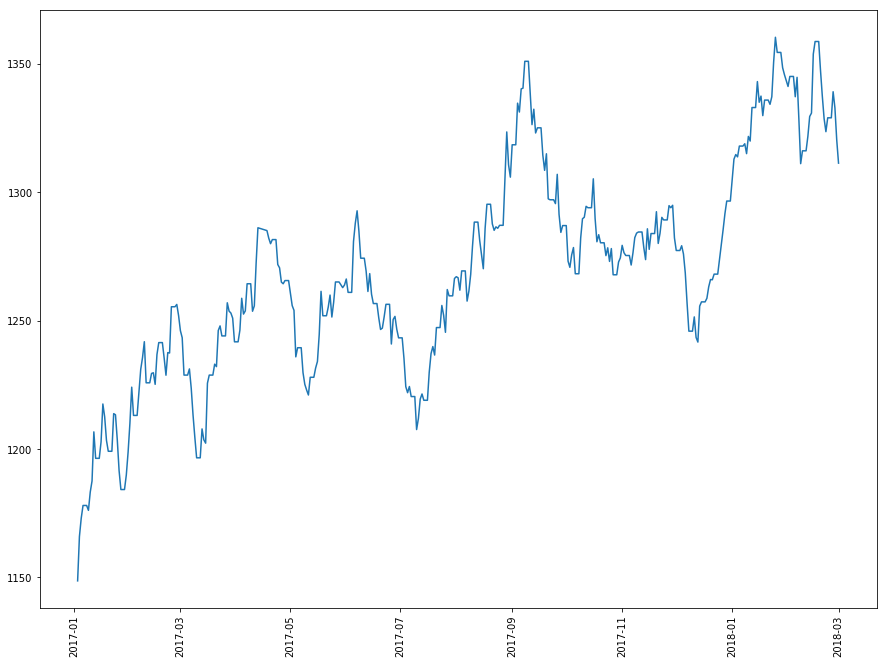

In [17]:
datad = data.resample('D')
datad = datad.fillna(method='ffill')
datad = datad.dropna()
plt.figure(figsize = (15,11))
plt.plot(datad)
plt.xticks(rotation='vertical')
plt.savefig('1')
plt.show()


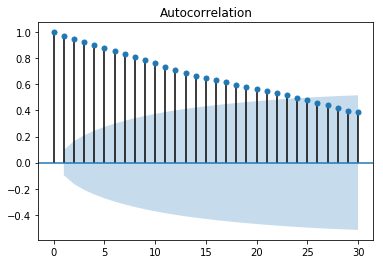

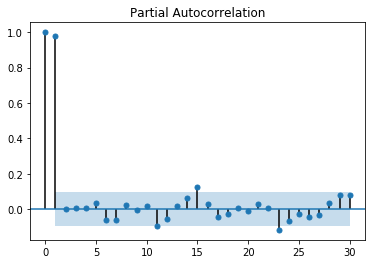

In [18]:
plot_acf(datad,lags=30)
plt.savefig('2')
plot_pacf(datad,lags=30)
plt.savefig('3')
plt.show()

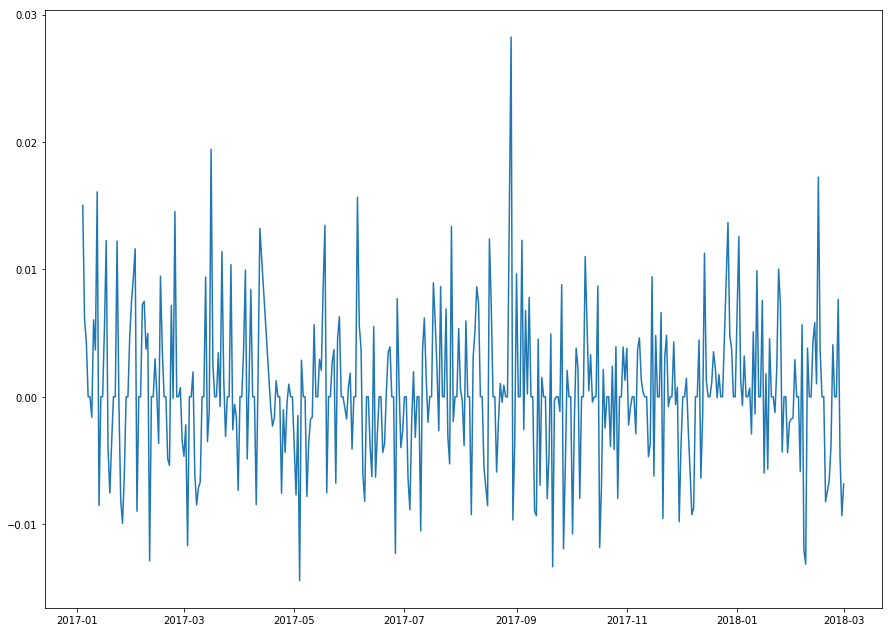

In [19]:
datad_p = datad.pct_change()
plt.figure(figsize = (15,11))
plt.plot(datad_p)
plt.savefig('4')
plt.show()

In [20]:
tstart = datetime.datetime(2014,1,2)
tend = datetime.datetime(2019,3,1)
datam = web.DataReader("GOLDAMGBD228NLBM","fred",tstart,tend)
datam = datam.fillna(method='ffill')

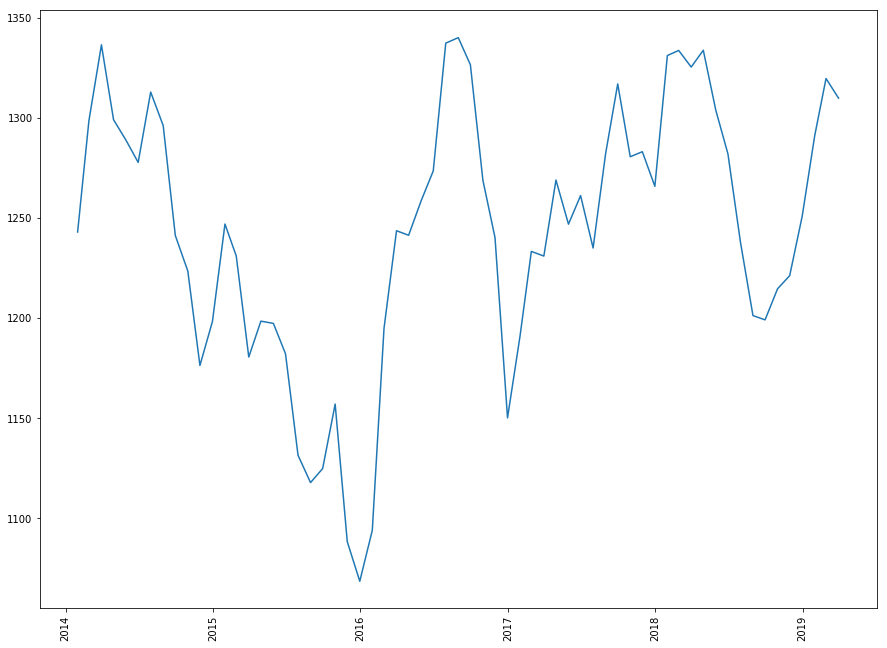

In [21]:
datam = datam.resample('M').mean()
datam = datam.dropna()
datam.to_csv('gold_monthly.csv')
plt.figure(figsize = (15,11))
plt.plot(datam)
plt.xticks(rotation='vertical')
plt.savefig('5')
plt.show()

### Plot ACF and PACF 

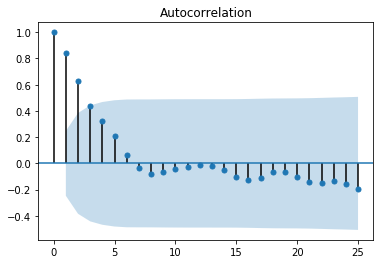

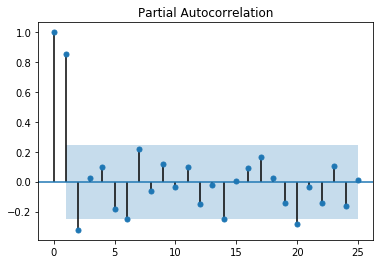

In [22]:
plot_acf(datam,lags=25)
plt.savefig('6')
plot_pacf(datam,lags=25)
plt.savefig('7')
plt.show()

In [23]:
ads_stat = adfuller(datam.iloc[:,0])
print(ads_stat[1])

0.05952229156789622


# baresi she!!!!! ino badi

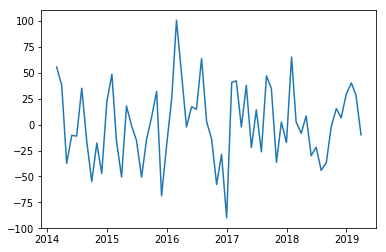

1.4813324744859504e-08


In [24]:
diffdata = datam.diff()
diffdata = diffdata.dropna()
plt.plot(diffdata)
plt.show()
ads_stat = adfuller(diffdata.iloc[:,0])
print(ads_stat[1])

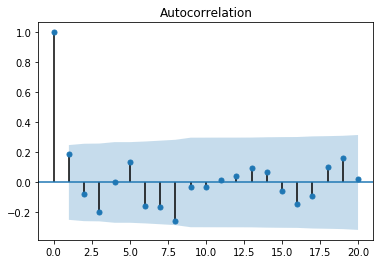

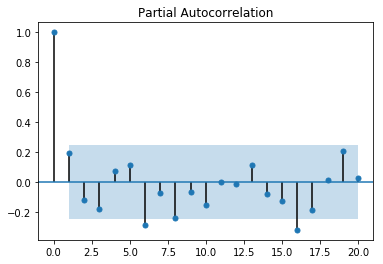

In [25]:
plot_acf(diffdata,lags=20)
plot_pacf(diffdata,lags=20)
plt.show()

In [26]:
print(datam.shape)

(63, 1)


In [27]:
model = ARMA(datam.iloc[0:55],order=(1,0))
model_ar1 = model.fit()
print(model_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:       GOLDAMGBD228NLBM   No. Observations:                   55
Model:                     ARMA(1, 0)   Log Likelihood                -275.990
Method:                       css-mle   S.D. of innovations             36.166
Date:                Fri, 21 Jun 2019   AIC                            557.979
Time:                        12:52:32   BIC                            564.001
Sample:                    01-31-2014   HQIC                           560.308
                         - 07-31-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1242.1474     27.365     45.392      0.000    1188.513    1295.782
ar.L1.GOLDAMGBD228NLBM     0.8363      0.068     12.320      0.000       0.703       0.969
    

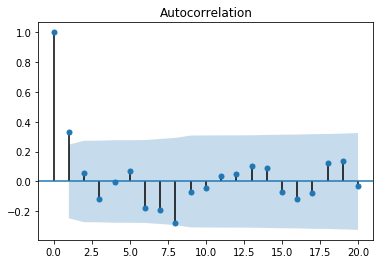

In [28]:
pred_values_ar1 = pd.DataFrame({ 'values': datam['GOLDAMGBD228NLBM'],'pred' : model_ar1.predict(start = 0, end = 70),
                                'res' : datam['GOLDAMGBD228NLBM'] - model_ar1.predict(start = 0, end = 70)})

pred_values_ar1 = pred_values_ar1.dropna()
plot_acf(pred_values_ar1['res'], lags=20)
plt.savefig('8')
plt.show()
pred_values_ar1.to_csv('gold_ar1.csv')


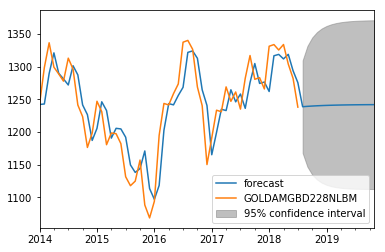

In [29]:
model_ar1.plot_predict(start = 0, end = 70)
plt.savefig('9')
plt.show()

In [30]:
model = ARMA(datam.iloc[0:55],order=(2,0))
model_ar2 = model.fit()
print(model_ar2.summary())

                              ARMA Model Results                              
Dep. Variable:       GOLDAMGBD228NLBM   No. Observations:                   55
Model:                     ARMA(2, 0)   Log Likelihood                -274.259
Method:                       css-mle   S.D. of innovations             34.994
Date:                Fri, 21 Jun 2019   AIC                            556.517
Time:                        12:52:34   BIC                            564.546
Sample:                    01-31-2014   HQIC                           559.622
                         - 07-31-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1240.1779     22.737     54.545      0.000    1195.615    1284.741
ar.L1.GOLDAMGBD228NLBM     1.0535      0.132      7.981      0.000       0.795       1.312
ar.L

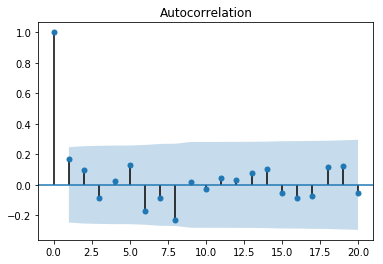

In [31]:
pred_values_ar2 = pd.DataFrame({ 'values': datam['GOLDAMGBD228NLBM'],'pred' : model_ar2.predict(start = 0, end = 70),
                                'res' : (datam['GOLDAMGBD228NLBM'] - model_ar2.predict(start = 0, end = 70))})

pred_values_ar2 = pred_values_ar2.dropna()
plot_acf(pred_values_ar2['res'], lags=20)
plt.show()

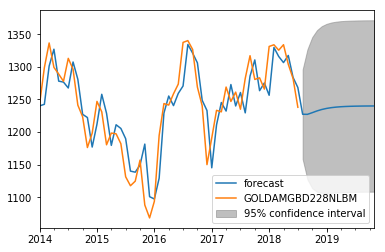

In [32]:
model_ar2.plot_predict(start = 0, end = 70)
plt.show()

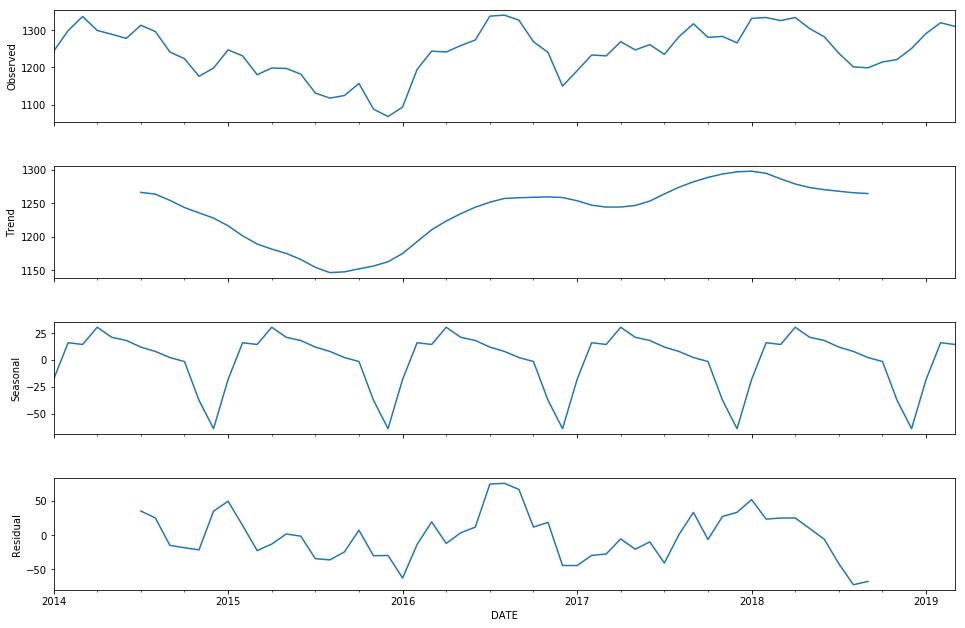

In [33]:
res = sm.tsa.seasonal_decompose(datam,freq=12)
fig = res.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.savefig('10')
plt.show()

In [34]:
mod = sm.tsa.statespace.SARIMAX(datam.iloc[0:60], 
                                order=(1,0,0), 
                                seasonal_order=(1,0,0,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
sarima1 = mod.fit()
print(sarima1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   GOLDAMGBD228NLBM   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -236.325
Date:                            Fri, 21 Jun 2019   AIC                            478.650
Time:                                    12:52:38   BIC                            484.200
Sample:                                01-31-2014   HQIC                           480.739
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.005    221.161      0.000       0.991       1.008
ar.S.L12       0.0100      0.144   

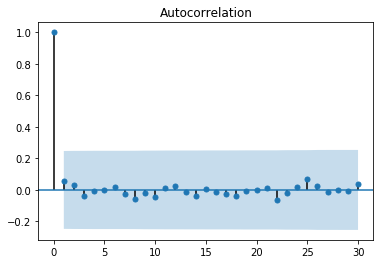

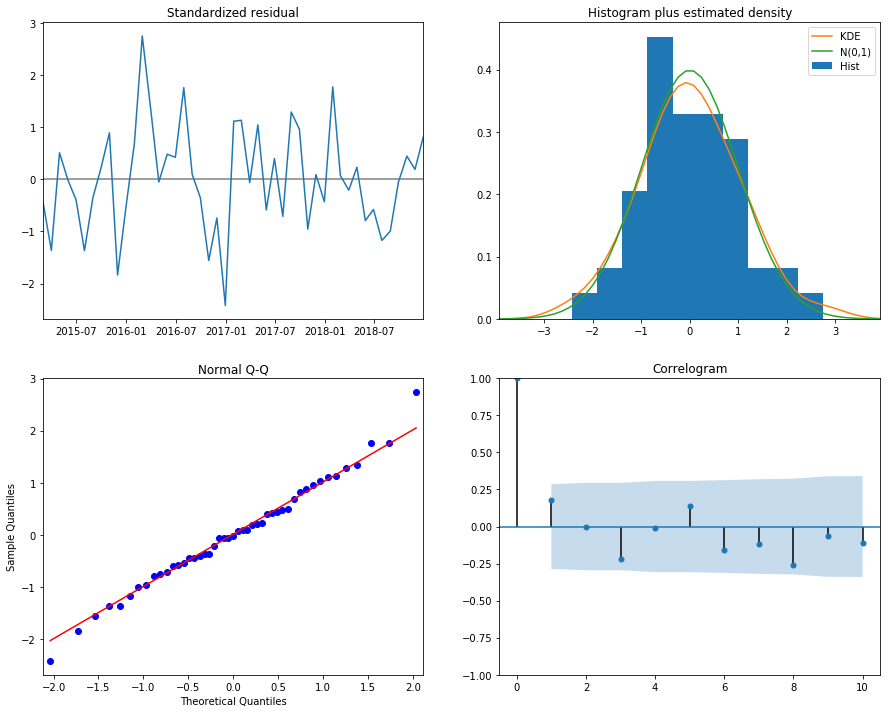

In [35]:
pred_values_sarima1 = pd.DataFrame({ 'values': datam['GOLDAMGBD228NLBM'],'pred' : sarima1.predict(start = 0,
                                                                                                  end = 70),
                                'res' : (datam['GOLDAMGBD228NLBM'] - sarima1.predict(start = 0, end = 70))})

pred_values_sarima1 = pred_values_sarima1.dropna()
pred_values_sarima1.to_csv('gold_sarima1.csv')
plot_acf(pred_values_sarima1['res'], lags=30)
plt.savefig('11')
sarima1.plot_diagnostics(figsize=(15, 12))
plt.savefig('12')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


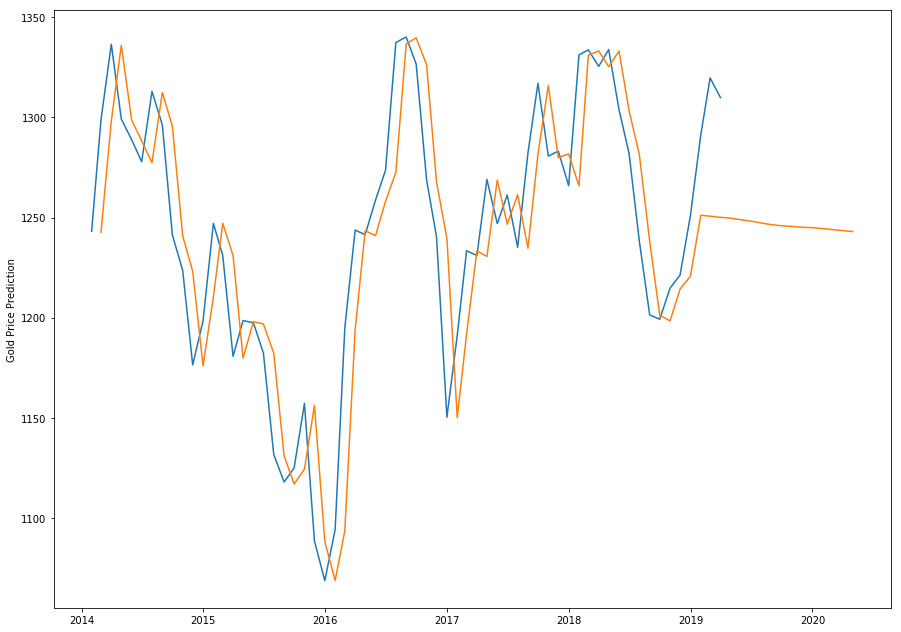

In [36]:
pred = sarima1.predict(start = 1, end = 75)
plt.figure(figsize = (15,11))
plt.plot(datam)
plt.plot(pred)
plt.ylabel('Gold Price Prediction')
plt.savefig('13')
plt.show()

In [40]:
mod = sm.tsa.statespace.SARIMAX(datam.iloc[0:60], 
                                order=(1,1,0), 
                                seasonal_order=(1,1,0,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
sarima2 = mod.fit()
print(sarima2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   GOLDAMGBD228NLBM   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -175.446
Date:                            Fri, 21 Jun 2019   AIC                            356.891
Time:                                    12:53:31   BIC                            361.471
Sample:                                01-31-2014   HQIC                           358.453
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2118      0.219      0.967      0.334      -0.218       0.641
ar.S.L12      -0.4710      0.139   

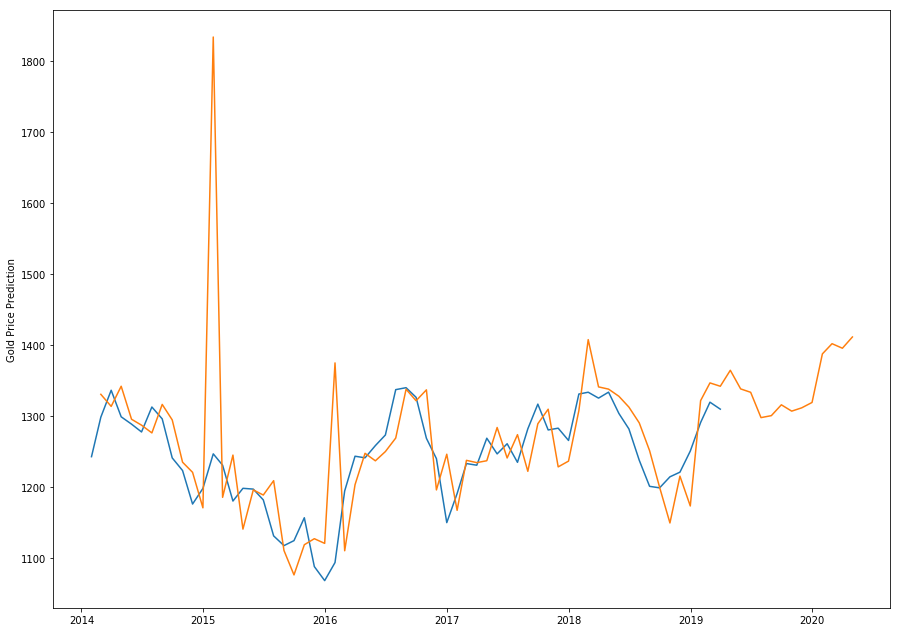

In [38]:
pred = sarima2.predict(start = 1, end = 75)
plt.figure(figsize = (15,11))
plt.plot(datam)
plt.plot(pred)
plt.ylabel('Gold Price Prediction')
plt.savefig('14')
plt.show()

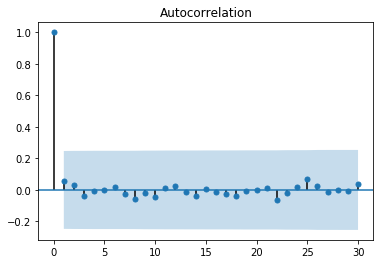

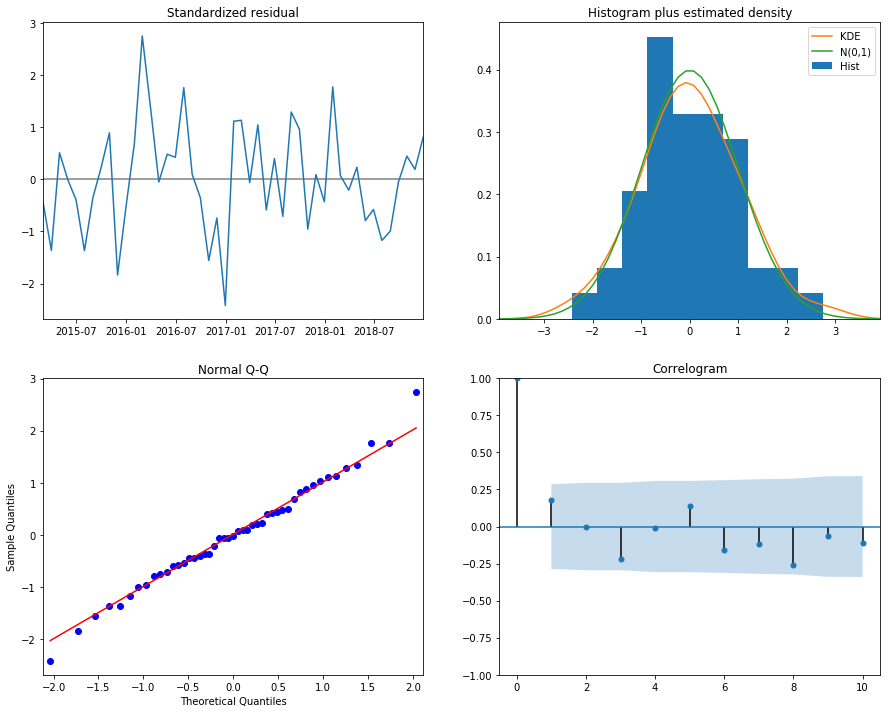

In [39]:
pred_values_sarima2 = pd.DataFrame({ 'values': datam['GOLDAMGBD228NLBM'],'pred' : sarima1.predict(start = 0,
                                                                                                  end = 70),
                                'res' : (datam['GOLDAMGBD228NLBM'] - sarima1.predict(start = 0, end = 70))})

pred_values_sarima1 = pred_values_sarima1.dropna()
pred_values_sarima1.to_csv('gold_sarima2.csv')
plot_acf(pred_values_sarima1['res'], lags=30)
plt.savefig('15')
sarima1.plot_diagnostics(figsize=(15, 12))
plt.savefig('16')
plt.show()

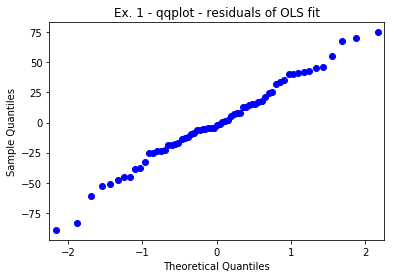

In [176]:
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.tsa.arima_model import ARMA,ARIMA

model = ARMA(data,order=(1,0))
model_ar = model.fit()
res = model_ar.resid
probplot = ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('Ex. 1 - qqplot - residuals of OLS fit')
plt.show()

In [347]:
from statsmodels.tsa.holtwinters import boxcox,SimpleExpSmoothing
first = SimpleExpSmoothing(datam)
firstex = first.fit()
firstex.predict(0,70)

2014-01-31    1246.500053
2014-02-28    1246.500001
2014-03-31    1326.851788
2014-04-30    1294.363174
2014-05-31    1292.026125
2014-06-30    1254.420375
2014-07-31    1312.352407
2014-08-31    1295.191829
2014-09-30    1285.854379
2014-10-31    1210.838563
2014-11-30    1173.665538
2014-12-31    1184.380226
2015-01-31    1199.085616
2015-02-28    1262.787905
2015-03-31    1205.638840
2015-04-30    1179.541726
2015-05-31    1204.026299
2015-06-30    1190.550638
2015-07-31    1175.171911
2015-08-31    1081.101564
2015-09-30    1125.009179
2015-10-31    1122.527739
2015-11-30    1147.471170
2015-12-31    1056.665075
2016-01-31    1062.188259
2016-02-29    1112.339386
2016-03-31    1232.803394
2016-04-30    1233.591194
2016-05-31    1274.047757
2016-06-30    1211.202515
                 ...     
2017-06-30    1263.816444
2017-07-31    1243.477360
2017-08-31    1266.097145
2017-09-30    1305.361088
2017-10-31    1287.153533
2017-11-30    1274.540989
2017-12-31    1282.065883
2018-01-31  

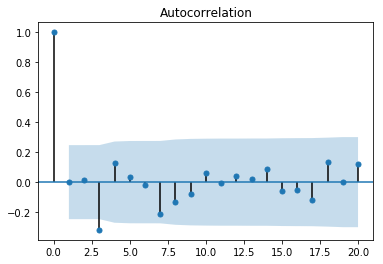

values         pred        res
DATE                                       
2014-01-31  1246.50  1246.500053  -0.000053
2014-02-28  1327.75  1246.500001  81.249999
2014-03-31  1294.00  1326.851788 -32.851788
2014-04-30  1292.00  1294.363174  -2.363174
2014-05-31  1254.00  1292.026125 -38.026125

In [349]:
pred_values_simpleExp = pd.DataFrame({ 'values': datam['GOLDAMGBD228NLBM'],'pred' : firstex.predict(start = 0, end = 70),
                                'res' : (datam['GOLDAMGBD228NLBM'] - firstex.predict(start = 0, end = 70))})

pred_values_simpleExp = pred_values_simpleExp.dropna()
plot_acf(pred_values_simpleExp['res'], lags=20)
plt.show()
pred_values_simpleExp.head()

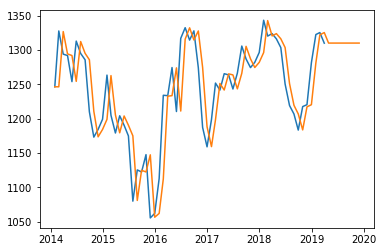

In [330]:
plt.plot(datam)
plt.plot(yhat)
plt.show()